Dataset loaded successfully!
   Unnamed: 0                                               Text  \
0           0   ڪراچي(ويب ڊيسڪ)قومي ڪرڪيٽ ٽيم جو اڳوڻو ناليوا...   
1           1   ممبئي(ويب ڊيسڪ)انگلينڊ پاڪستان جا سڀ ٿورا وسا...   
2           2   .ٽوڪيو (ويب ڊيسڪ)ٽوڪيو اولمپڪس ۾ وڌيڪ ٽن راند...   
3           3   اسلام آباد(ويب ڊيسڪ) سڌُ سماءَ واري وفاقي وزي...   
4           4   \nڪراچي(ويب ڊيسڪ) ڪشمير پريميئر ليگ (ڪي پي اي...   

                           link  \
0  https://awamiawaz.pk/752736/   
1  https://awamiawaz.pk/752734/   
2  https://awamiawaz.pk/752357/   
3  https://awamiawaz.pk/752332/   
4  https://awamiawaz.pk/752284/   

                                               title   Label  
0  \n\t\t\t\tشاهد آفريدي ڪي پي ايل ۾ جوهر ڏيکارڻ ...  sports  
1  \n\t\t\t\tانگلينڊ پاڪستان جا سڀ ٿورا وساري ڇڏي...  sports  
2  \n\t\t\t\tٽوڪيو اولمپڪس مان پاڪستان جي وڌيڪ ٽن...  sports  
3  \n\t\t\t\tڀارت راند کي سياست ۾ آڻي پنهنجو خراب...  sports  
4  \n\t\t\t\tڪشمير پريميئر ليگ جي شي

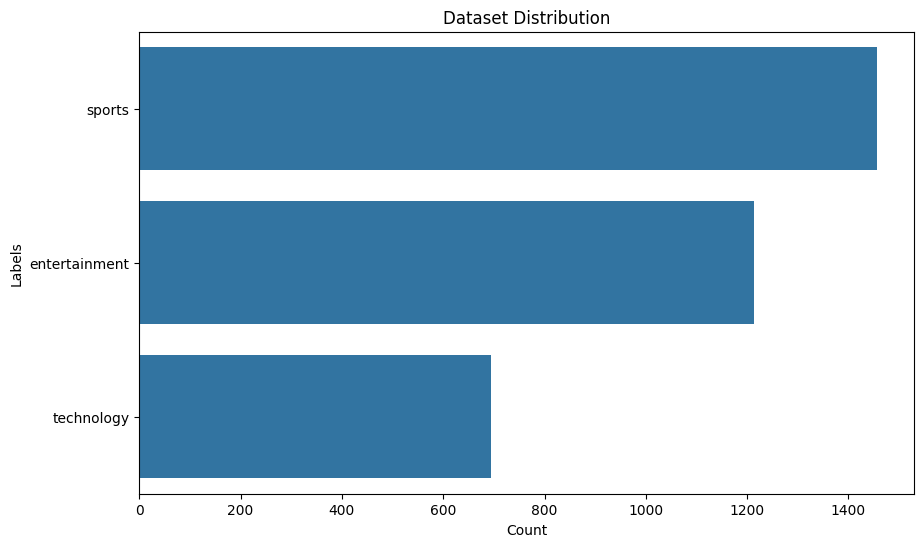

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.4675 - loss: 1.0045 - val_accuracy: 0.8472 - val_loss: 0.4012
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9415 - loss: 0.1875 - val_accuracy: 0.9451 - val_loss: 0.1174
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9900 - loss: 0.0270 - val_accuracy: 0.9510 - val_loss: 0.1540
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9998 - loss: 0.0042 - val_accuracy: 0.9599 - val_loss: 0.1241
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.9688 - val_loss: 0.1193
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 1.0000 - loss: 5.5717e-04 - val_accuracy: 0.9674 - val_loss: 0.1273
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 1.0000 - loss: 2.7638e-04 - val_accuracy: 0.9688 - val_loss: 0.1591
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 

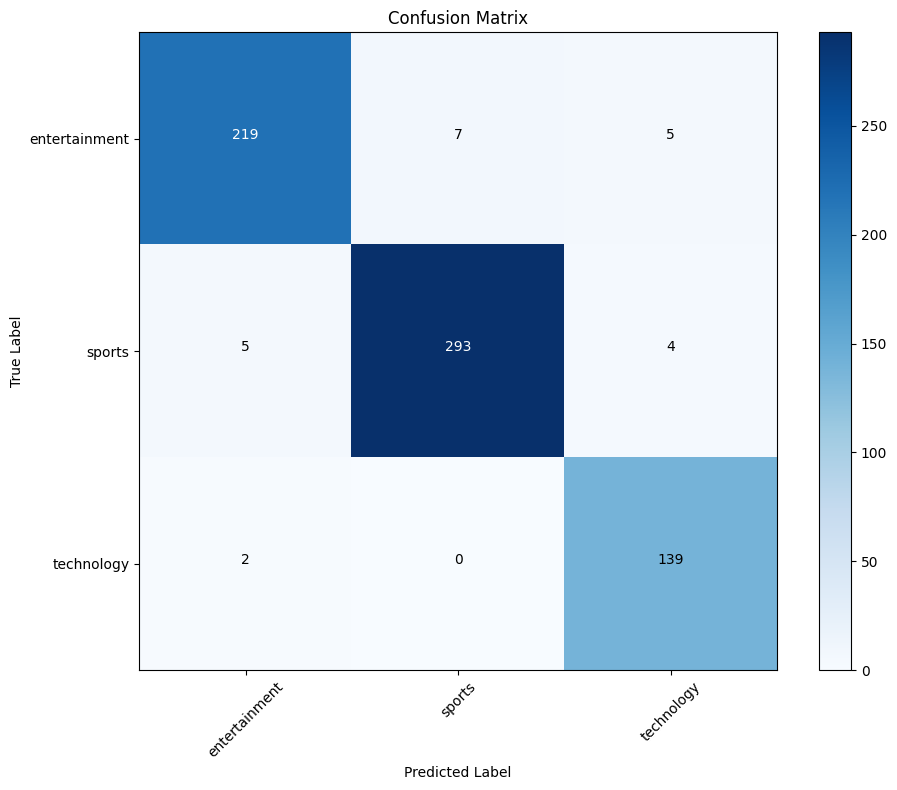

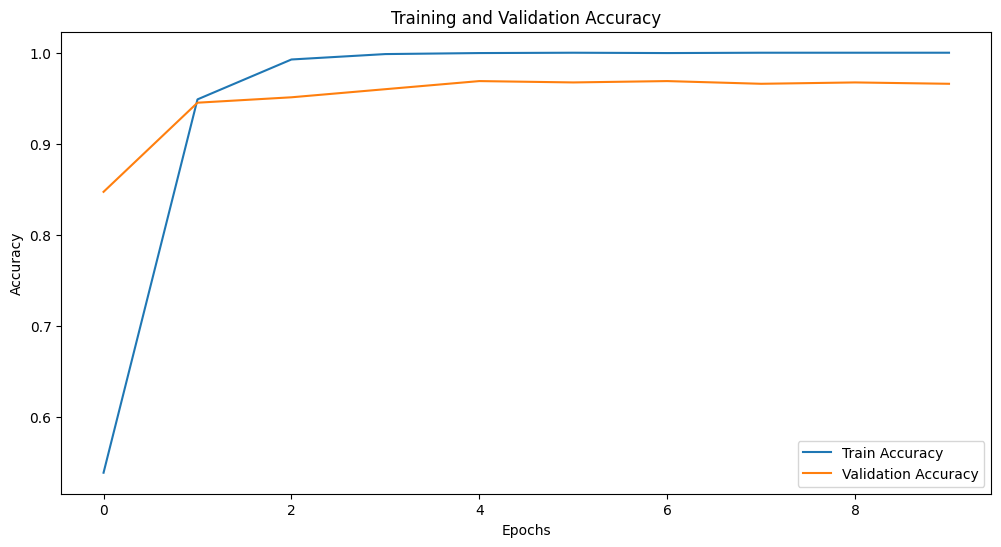

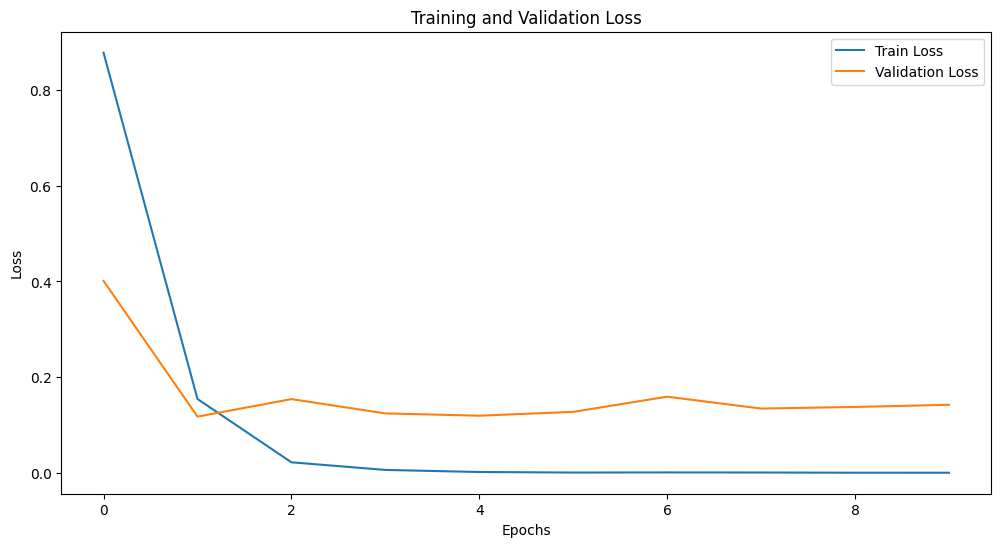

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools  # Missing import added
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Load the Sindhi dataset from the GitHub link
data_url = "https://raw.githubusercontent.com/rajavavek/SindMT/main/Articles%20Dataset.csv"
data = pd.read_csv(data_url)

# Adjust column names for consistency
data.rename(columns={"article": "Text", "genre": "Label"}, inplace=True)

# Display dataset info
print("Dataset loaded successfully!")
print(data.head())
print(data.info())

# Dataset distribution bar chart
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Label'], order=data['Label'].value_counts().index)
plt.title('Dataset Distribution')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

# Preprocess text data
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"[\u200c\u200b]+", " ", text)  # Remove zero-width characters
    text = re.sub(r"[^\u0620-\u064A\u0660-\u0669\s]", "", text)  # Keep Sindhi characters and digits
    return text

# Apply preprocessing
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
data['Label_Encoded'] = label_encoder.fit_transform(data['Label'])

# Tokenize and pad sequences
max_vocab_size = 5000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(data['Processed_Text'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, data['Label_Encoded'], test_size=0.2, random_state=42
)

# CNN model architecture
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),  # Convolution layer with 128 filters and kernel size of 5
    MaxPooling1D(pool_size=4),  # Max pooling layer
    Dropout(0.2),
    Conv1D(64, 5, activation='relu'),  # Another convolutional layer with 64 filters
    MaxPooling1D(pool_size=4),  # Another max pooling layer
    Dropout(0.2),
    Flatten(),  # Flatten the 2D output to 1D
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

cm = confusion_matrix(y_test, y_pred_classes)
plot_confusion_matrix(cm, classes=label_encoder.classes_)

# Plot training accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Get classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Confusion matrix summary
cm = confusion_matrix(y_test, y_pred_classes)
cm_df = pd.DataFrame(cm, columns=label_encoder.classes_, index=label_encoder.classes_)

# Add the accuracy and loss from training history
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create a summary table for all results
summary = {
    "Metric": ["Train Accuracy", "Validation Accuracy", "Train Loss", "Validation Loss"],
    "Value": [train_accuracy, val_accuracy, train_loss, val_loss]
}
summary_df = pd.DataFrame(summary)

# Print all results
print("\nClassification Report:\n", report_df)
print("\nConfusion Matrix:\n", cm_df)
print("\nModel Training Summary:\n", summary_df)



Classification Report:
                precision    recall  f1-score     support
entertainment   0.969027  0.948052  0.958425  231.000000
sports          0.976667  0.970199  0.973422  302.000000
technology      0.939189  0.985816  0.961938  141.000000
accuracy        0.965875  0.965875  0.965875    0.965875
macro avg       0.961627  0.968022  0.964595  674.000000
weighted avg    0.966208  0.965875  0.965879  674.000000

Confusion Matrix:
                entertainment  sports  technology
entertainment            219       7           5
sports                     5     293           4
technology                 2       0         139

Model Training Summary:
                 Metric     Value
0       Train Accuracy  1.000000
1  Validation Accuracy  0.965875
2           Train Loss  0.000124
3      Validation Loss  0.142124
